In [1]:
import Dynamics
from casadi import *
from IPython.display import HTML
import Environment
import matplotlib.animation as animation
import MPC_Solver

### hyperparameters

In [2]:
PARAMS = {}

T = 1.2 # MPC horizon
N = 25 # horion divides on N steps

# boundary conditions
U_MAX = 80

PARAMS["Horizon"] = T
PARAMS["N"] = N
PARAMS["U_MAX"] = U_MAX

### Creation of integrator
$
\dot{
\begin{pmatrix}
     {\phi} \\
     {\phi}
\end{pmatrix}} = 
\begin{pmatrix}
     {\dot{\phi}} \\
     {rhs}
\end{pmatrix}
$

In [3]:
x = vertcat(Dynamics.phi,Dynamics.dphi)
u = Dynamics.u

ode = Dynamics.my_rhs(x[:3],x[3:],u)
dae = {'x':x, 'p':u, 'ode':ode}
intg_options = {'tf': T/N}

intg = integrator('intg','rk',dae,intg_options)

PARAMS["integrator"] = intg

### Problem dimention

In [4]:
x_dim = 6
u_dim = 1

PARAMS["x_dim"] = x_dim
PARAMS["u_dim"] = u_dim

### MPC formulation

#### initialization

In [5]:
PARAMS["weights"] = [0.1,100,100,0,0,0]
mpc = MPC_Solver.get_MPC_solver(params=PARAMS)

###  Environment testing

In [6]:
env = Environment.DoublePendulumEnv([0,-np.pi/2,-np.pi/2,0,0,0],dt = 0.01 ) # initialise system
x_calc_goal = np.array([0,np.pi/2,np.pi/2,0,0,0]*(N+1),dtype = float) # state_goal

Environment initialized


#### loop
* x = env.state
* u = mpc(x,goal)  - give optimal u variable with shape u_dim * N
* env.step(u[0]) - apply first action


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


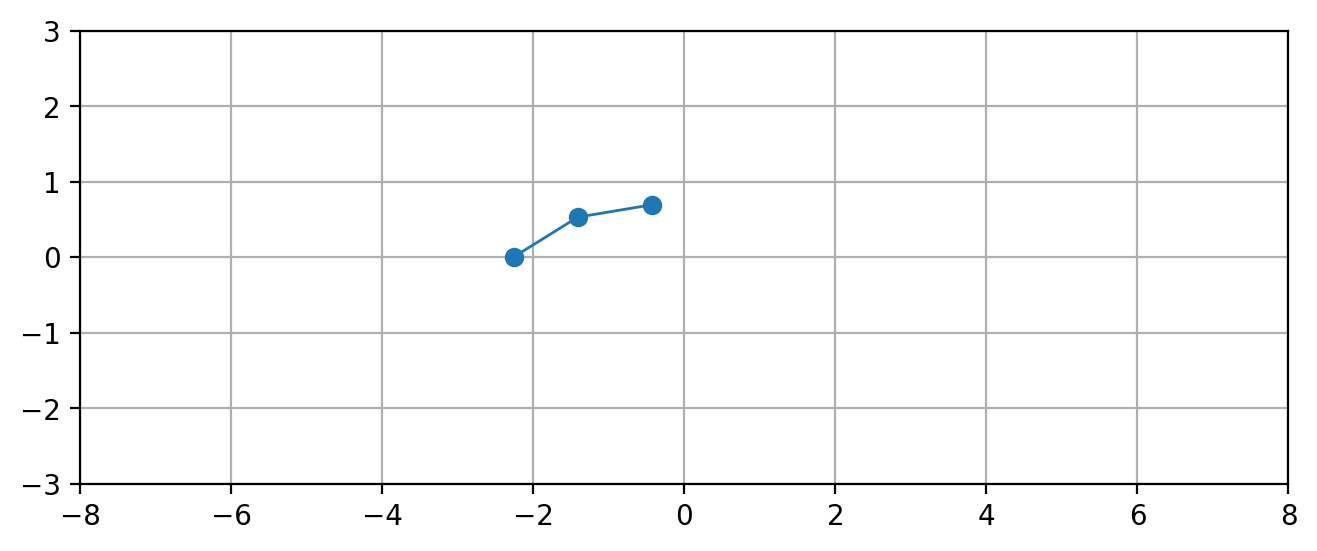

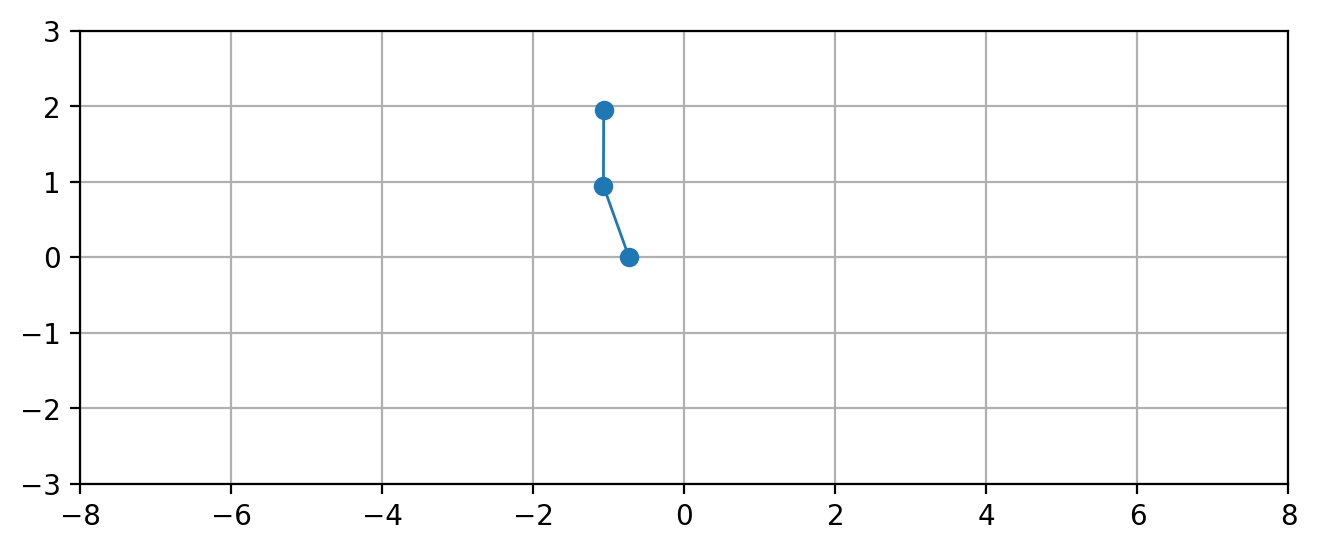

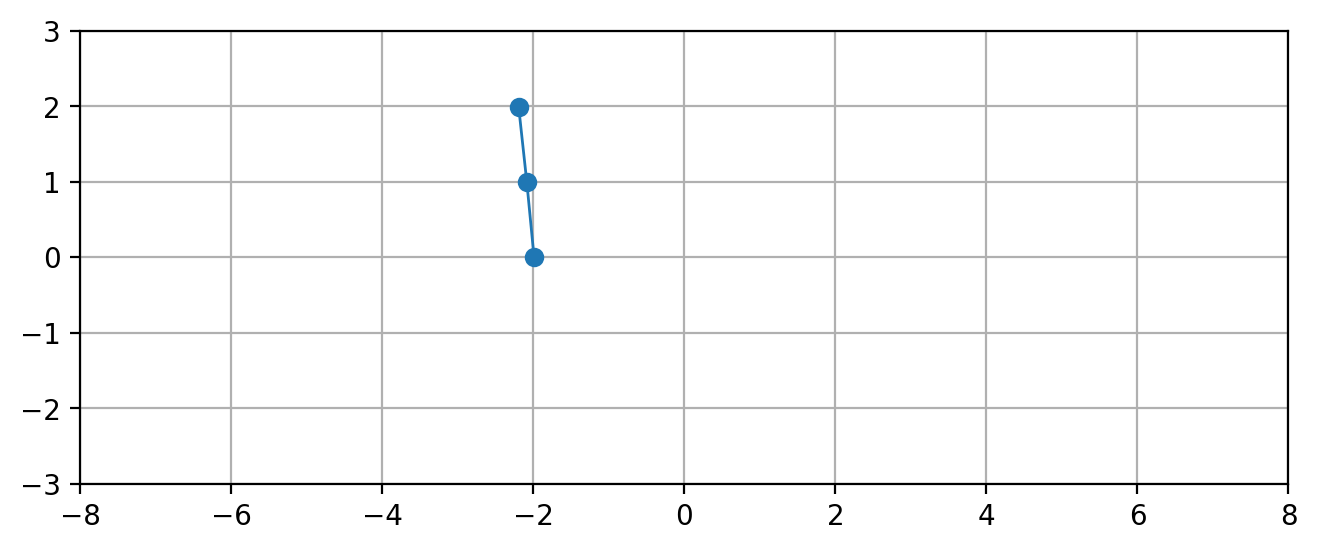

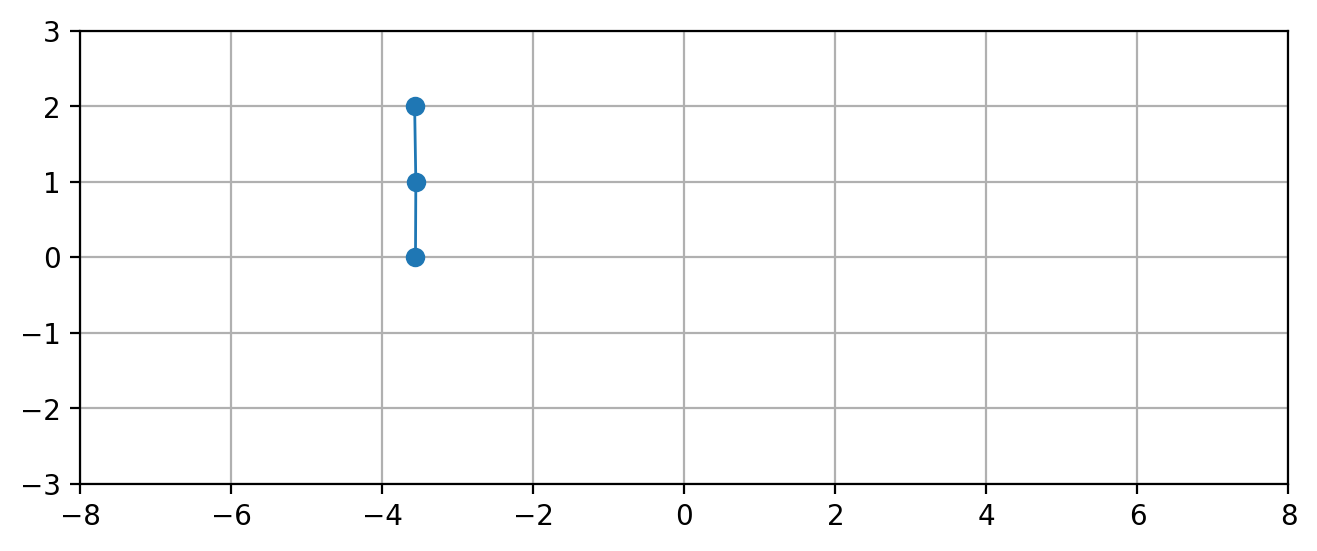

In [10]:
env.reset()
x0_calc = env.state
NumSteps = 250

X_story = [0]*NumSteps
X_story[0] = x0_calc
X_real = [0]*NumSteps
X_real[0] = x0_calc
U_hist = []

for i in range(1,NumSteps):
    u = mpc(env.state,x_calc_goal).full()
    u = u[0]
    U_hist.append(u)
    env.step(u)
    
    x0_calc = intg(x0 = x0_calc,p = u)['xf'].full() # it is integrator from mpc for testing consistency of predictions between env and mpc
    X_real[i] = env.state
    X_story[i] = np.array(x0_calc)
    if i % 10 == 0:
        print(i)
    if i % 50 == 0:
        ani = env.render()
        HTML(ani.to_jshtml())

### Visual

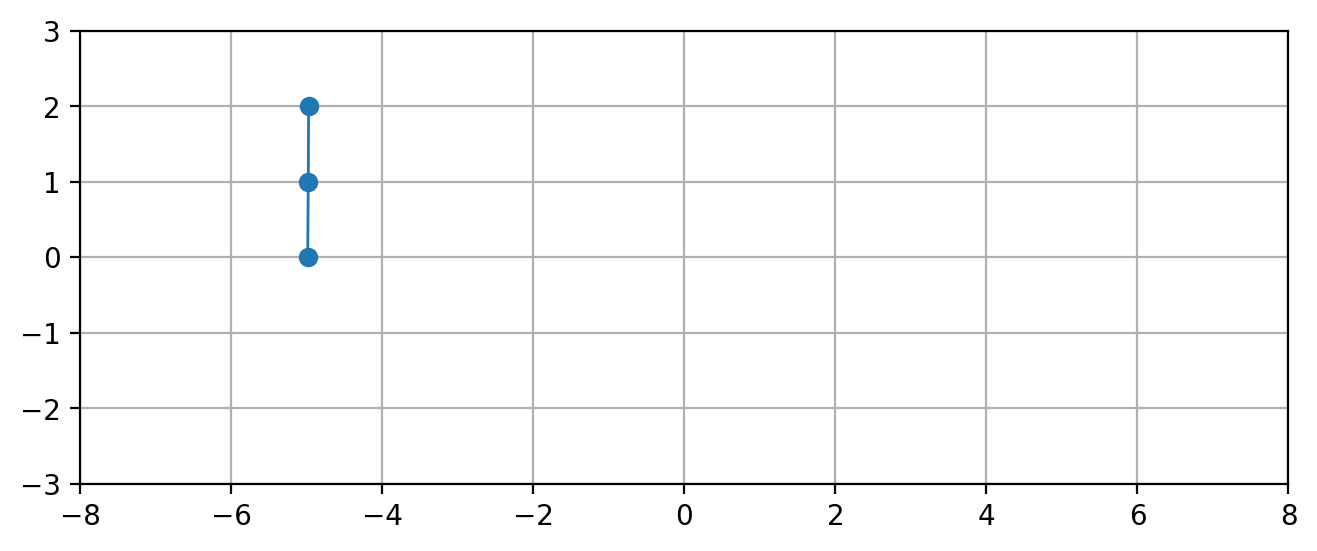

In [11]:
ani = env.render()
HTML(ani.to_jshtml())

writergif = animation.PillowWriter(fps=30) 
ani.save('lol4.gif', writer=writergif)

In [9]:
env.action_history

[array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-80.0000008]),
 array([-56.85596173]),
 array([-32.6581292]),
 array([-12.80230222]),
 array([3.49008108]),
 array([16.88301291]),
 array([28.04100271]),
 array([37.38955222]),
 array([44.7134036]),
 array([50.67196472]),
 array([55.59356022]),
 array([59.85131683]),
 array([63.85700079]),
 array([66.53677558]),
 array([68.60208766]),
 array([70.34377394]),
 array([72.00001519]),
 array([73.86015476]),
 array([75.33138911]),
 array([76.06766739]),
 array([78.31431479]),
 array([76.73458229]),
 array([78.68615009]),
 array([79.99999961]),
 array([80.0000007]),
 array([78.96607104]),
 array([80.0

In [13]:
f = r"animation.gif" 
writergif = animation.PillowWriter(fps=30) 
ani.save(f, writer=writergif)